In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

We can see that Loan_ID is unique to all data points.Hence we can set Loan_ID as index.

In [6]:
data.set_index(data.Loan_ID, inplace = True)
data.drop('Loan_ID', axis = 1, inplace = True)

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


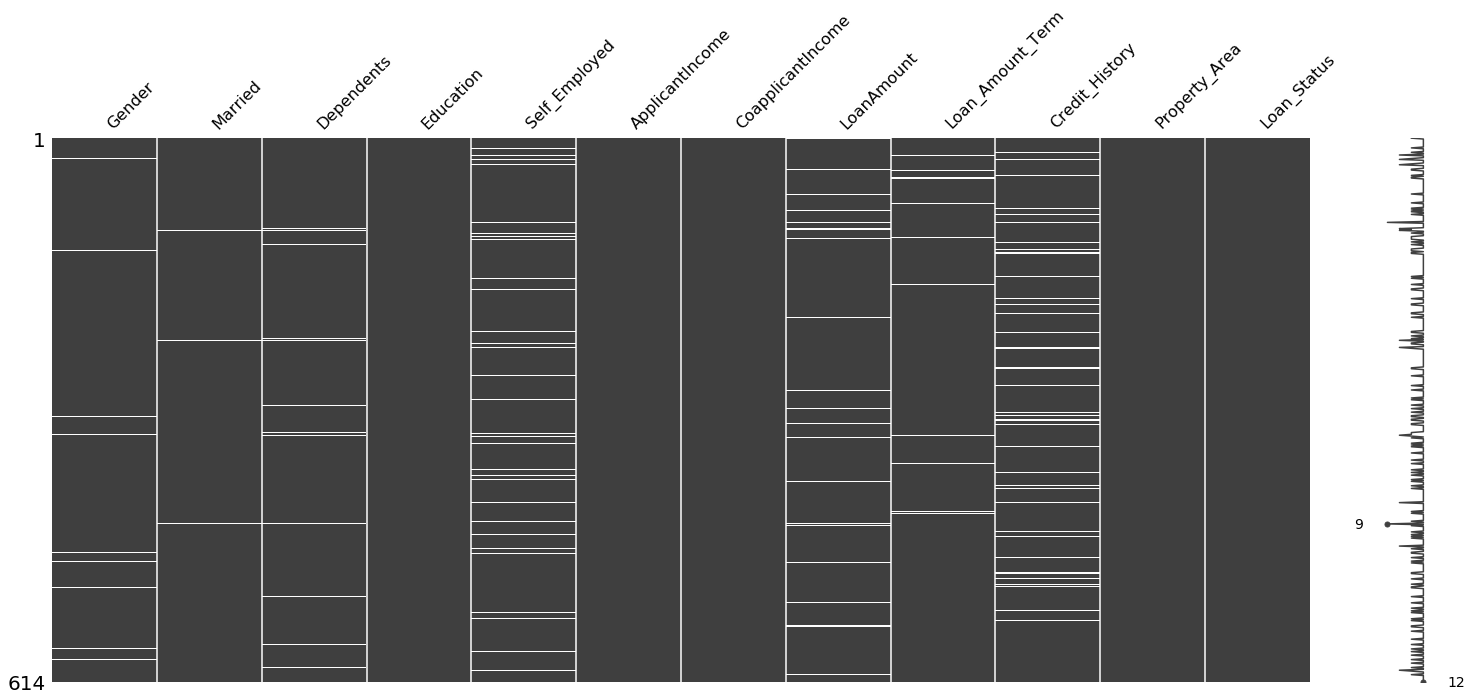

In [8]:
msno.matrix(data)

In [9]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
corr_matrix=data.corr()
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


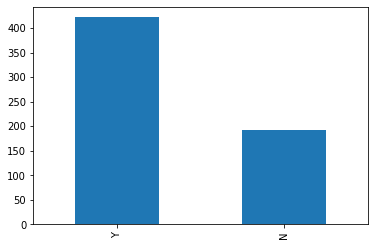

In [12]:
data['Loan_Status'].value_counts().plot.bar()

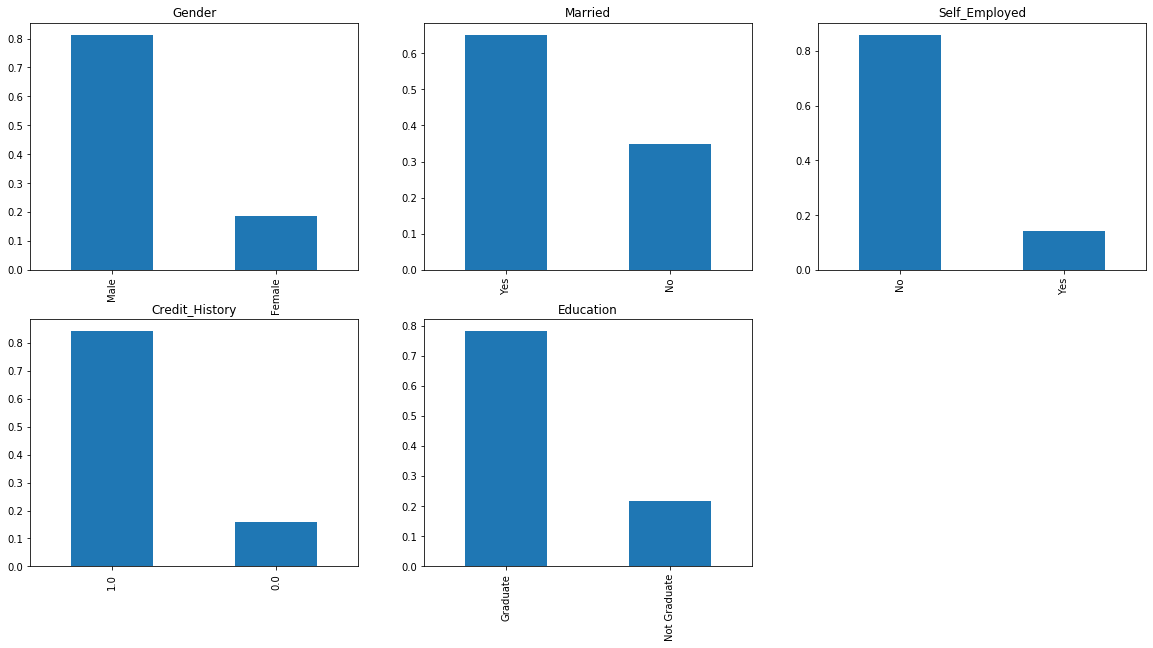

In [13]:
plt.subplot(231)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

It can be inferred from the above bar plots that:

1. 80% applicants in the dataset are male.
2. Around 65% of the applicants in the dataset are married.
3. Around 15% applicants in the dataset are self employed.
4. Around 85% applicants have credit history (repaid their debts).
5. Around 80% of the applicants are Graduate.

In [14]:
X1 = 'Loan_Status'
Type1 = data[X1].value_counts().index
f = data[X1].value_counts()

for k in Type1:
   print(k, data[data[X1] == k][['Credit_History']].isnull().sum()/f[k])

Y Credit_History    0.087678
dtype: float64
N Credit_History    0.067708
dtype: float64


In [15]:
X1 = 'Married'
Type1 = data[X1].value_counts().index
f = data[X1].value_counts()

for k in Type1:
   print(k, data[data[X1] == k][['Credit_History']].isnull().sum()/f[k])

Yes Credit_History    0.090452
dtype: float64
No Credit_History    0.065728
dtype: float64


In [16]:
X1 = 'Loan_Amount_Term'
Type1 = data[X1].value_counts().index
f = data[X1].value_counts()

for k in Type1:
   print(k, data[data[X1] == k][['Credit_History']].isnull().sum()/f[k])

360.0 Credit_History    0.082031
dtype: float64
180.0 Credit_History    0.022727
dtype: float64
480.0 Credit_History    0.066667
dtype: float64
300.0 Credit_History    0.230769
dtype: float64
84.0 Credit_History    0.25
dtype: float64
240.0 Credit_History    0.25
dtype: float64
120.0 Credit_History    0.0
dtype: float64
36.0 Credit_History    0.0
dtype: float64
60.0 Credit_History    0.0
dtype: float64
12.0 Credit_History    1.0
dtype: float64


We can see that credit history for customers whose term of loan is 12 months is not available

In [17]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

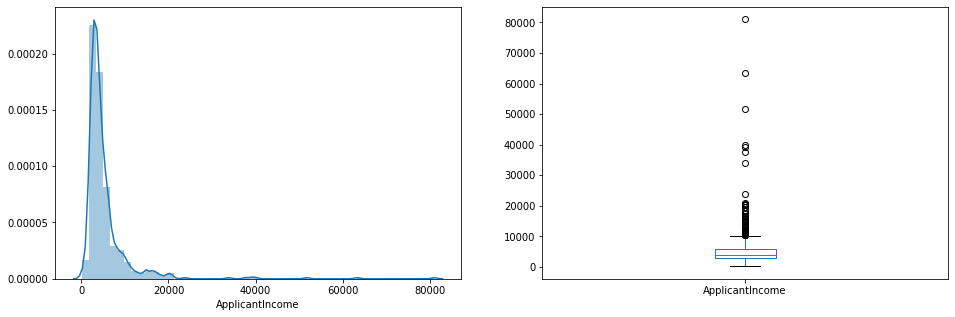

In [18]:
plt.subplot(121)
sns.distplot(data['ApplicantIncome']);

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [19]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)


In [20]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
data=pd.get_dummies(data, columns =['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)



In [22]:
data.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Gender_Male                  uint8
Married_Yes                  uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Not Graduate       uint8
Self_Employed_Yes            uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [23]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,
LP001002,5849,0.0,120.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
LP001003,4583,1508.0,128.0,360.0,1.0,N,1,1,1,0,0,0,0,0,0
LP001005,3000,0.0,66.0,360.0,1.0,Y,1,1,0,0,0,0,1,0,1
LP001006,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,0,0,1,0,0,1
LP001008,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('Loan_Status',axis=1),data['Loan_Status'] , test_size=0.3, random_state=42)

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


n_estimators = [int(x) for x in np.linspace(10, 2000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

classifier = RandomForestClassifier()
random = RandomizedSearchCV(classifier,params)

In [26]:
reg = random.fit(X_train, y_train)

In [27]:
print(random.best_params_)
print(random.score(X_train, y_train))
print(random.score(X_test, y_test))

{'n_estimators': 1778, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
0.972027972027972
0.7891891891891892


In [28]:
test = pd.read_csv('test.csv',index_col='Loan_ID')
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [29]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

In [30]:
test=pd.get_dummies(test, drop_first = True)
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,
LP001015,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
LP001022,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
LP001031,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
LP001035,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
LP001051,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [31]:
fin = random.predict(test)
fin.shape


(367,)

In [32]:
fin = pd.DataFrame(fin, columns = ['Loan_Status'], index=test.index)

In [33]:
fin.to_csv('Values.csv')

In [34]:
fin.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,N
